# TSNE for Posters and Talk

In [2]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs, TSNEPlot
from larval_gonad.config import memory

# Setup notebook
nbconfig = Nb.setup_notebook(subproject_dir='../output/tSNE_for_poster_and_talk', seurat_dir='../output/combined_testis_force')

last updated: 2018-04-01 
Git hash: 3e21515a1ca9937b42fb93ac97bbfdc54fa27bdc


In [3]:
clusters = nbconfig.seurat.get_clusters()
tsne = nbconfig.seurat.get_tsne()
norm = nbconfig.seurat.get_normalized_read_counts()

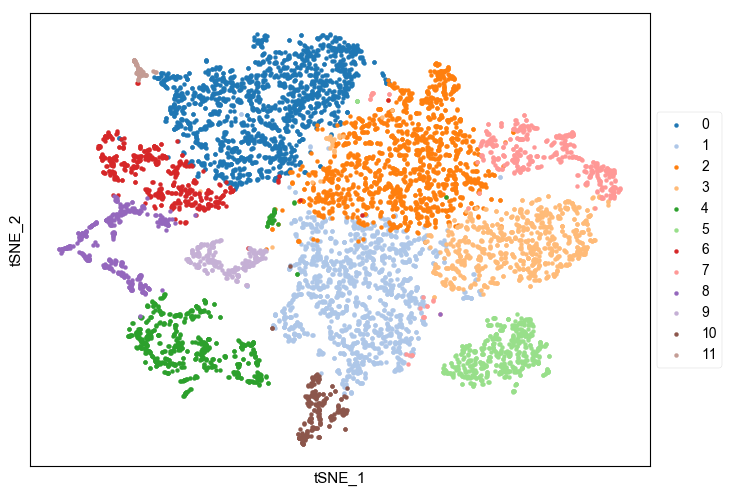

In [4]:
TSNEPlot(data=tsne.join(clusters), hue='res.0.4', palette=sns.color_palette('tab20', n_colors=12), s=8)

In [5]:
greys = sns.color_palette('Greys')
reds = sns.color_palette('Reds')
reds[0] = greys[0]
blacks = [greys[0], '#000000']

In [6]:
import string
def sanitize_fname(fname):
    valid_chars = "-_.%s%s" % (string.ascii_letters, string.digits)
    return ''.join([x for x in fname if x in valid_chars])

In [7]:
def _plot(gene):
    fbgn = nbconfig.symbol2fbgn[gene]
    fname = f"../output/tSNE_for_poster_and_talk/{gene}_{fbgn}.pdf"
    
    if Path(fname).exists():
        return
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(1/3))
    try:
        TSNEPlot(data=tsne.join(norm.T), hue=fbgn, palette=reds, ax=ax1)
        TSNEPlot(data=tsne.join(norm.T > 0), hue=fbgn, palette=blacks, ax=ax2)
    except KeyError:
        pass

    ax1.set_aspect('equal')
    ax2.set_aspect('equal')

    fig.suptitle(f'{gene} ({fbgn})', fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, .95])
    
    plt.savefig(fname)
    plt.close()

In [8]:
targets = [
    'AkhR',
    'CG2187',
    'CG31644',
    'CG34383',
    'CG34394',
    'CG4822',
    'ChAT',
    'Dek',
    'Eh',
    #'EHR',
    'ETHR',
    'Efa6',
    'Fas3',
    'Hr3',
    'Mapmodulin',
    'Proc-R',
    'bam',
    'bol',
    'CadN',
    'dj',
    'dsx',
    'hng3',
    'mael',
    'nord',
    'p53',
    'Pburs',
    'qin',
    'qjt',
    'rk',
    'tj',
    'tkv',
    'trn',
    'vas',
]

In [9]:
for t in targets:
    try:
        nbconfig.symbol2fbgn[t]
    except KeyError:
        print(t)

In [10]:
for g in targets:
    _plot(g)

In [11]:
norm.shape

(14312, 8066)

In [12]:
biomarkers = pd.read_csv(Path(nbconfig.seurat_dir, 'biomarkers_0.4.tsv'), sep='\t')

In [13]:
short = biomarkers.query('p_val_adj <= 0.001').sort_values(['cluster', 'avg_logFC'])

In [14]:
short.to_csv(nbconfig.table_name('biomarkers_0.4.tsv'), sep='\t', index=False)